   # hapPyness: Project One 
 Team Boa 
       (Aashita, 
       Alannah,
       Ben,
       and Brian)

Charles Schulz once said that “happiness is a warm puppy”. According to Walt Disney, “happiness is a state of mind” and author, Tom Bodett, offered that "a person needs just three things to be truly happy in this world: Someone to love, something to do, and something to hope for.” For many, happiness is hard to quantify. However, in 2012 the first World Happiness Report was published based on Gallup poll data. This report uses six factors to measure happiness: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. (Tom may have been on to something.)

Our team will be analyzing this data to determine correlations between metrics (such as the relationship between GDP per capita and the happiness index, and life expectancy vs freedom) and across years. We will also focus on the position of the United States on the list, seeing just how we measure up to the happiest and uphappiest nations to start, then going on to further analyze the metrics to see what story they tell. It will also be interesting to see how 2020 measures up to years prior, considering the Covid-19 pandemic, widespread social unrest, and the general consensus that it was a terrible year.

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import gmaps
import googlemaps
from mpl_toolkits import mplot3d

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Import API key
from config import g_key

# Configure googlemaps with API key
gm = googlemaps.Client(key=g_key)
plt.style.use('fivethirtyeight')

In [2]:
# Store csv file paths in variables
path_2016 = "../Resources/clean_data_2016.csv"
path_2017 = "../Resources/clean_data_2017.csv"
path_2018 = "../Resources/clean_data_2018.csv"
path_2019 = "../Resources/clean_data_2019.csv"
path_2020 = "../Resources/clean_data_2020.csv"
path_all_years = "../Resources/clean_data_all_years.csv"

In [3]:
# Import data from csv files
clean_data_2016_df = pd.read_csv(path_2016)
clean_data_2017_df = pd.read_csv(path_2017)
clean_data_2018_df = pd.read_csv(path_2018)
clean_data_2019_df = pd.read_csv(path_2019)
clean_data_2020_df = pd.read_csv(path_2020)
clean_data_all_years_df = pd.read_csv(path_all_years)

In [4]:
#Top Five countries based on Happiness Score 2020
clean_data_2020_df=clean_data_2020_df.drop(columns=['Unnamed: 0'])
clean_data_2020_df.nlargest(5,'Happiness Score')

# Top Ten countries based on happiness score 2020
# clean_data_2020_new= clean_data_2020_df.groupby(['Country'], sort=False)['Happiness Score'].max().head(10)
# clean_data_2020_new

,Country,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Year
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2020
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2020
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2020
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2020
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2020


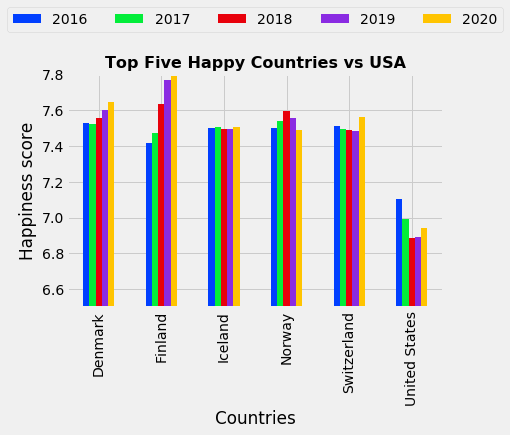

In [5]:
# Generate a bar plot showing how USA stacked against Top 5 countries' Happiness score over 5 Years
happiness_table = pd.pivot_table(clean_data_all_years_df, index= 'Country', columns='Year', values="Happiness Score")
happiness_top5=happiness_table.query('Country == ["Finland", "Denmark","Switzerland","Iceland","Norway", "United States"]')
plt.style.use('seaborn-bright')
happiness_top5.plot(kind='bar');
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=5)
plt.ylim(6.5, 7.8)

# Set a title for the chart
plt.title('Top Five Happy Countries vs USA',fontweight='bold',fontsize = 16)
plt.xlabel('Countries')
plt.ylabel('Happiness score')
plt.savefig('Top5 Happiness Score.png')
plt.show()

The top five happiest countries of the world seem to be in Europe.The happiness score for top 5 countries does not change significantly from 2016-2020 except for Finland.United States' happiness score is significnatly lower than the top 5 countries .To explore the factors that could be contributing to the score differences between world regions, we will be looking at six factors of happiness for each of the countries and analyze the happiness rank of US in the past 5 years and figure which key metrics or attributes (that is within the control of the government) need to be changed to bring US within the top 10 Countries in the world. 

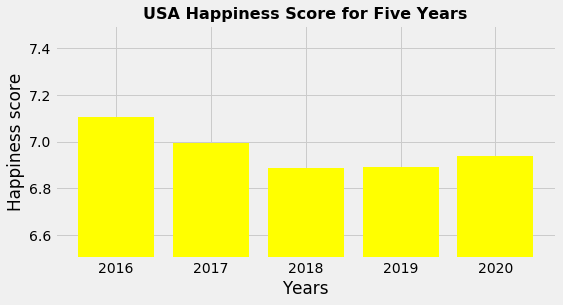

In [6]:
# Create USA only Happiness Dataframe
usa_df = clean_data_all_years_df.loc[clean_data_all_years_df['Country'] == 'United States']
us_df = usa_df.drop(columns=['Unnamed: 0','Year'])

# Generate a bar plot showing the USA Happiness Score for Five years

# Set axis 
x_axis =usa_df['Year'].tolist()
y_axis = usa_df['Happiness Score'].tolist()
plt.figure(figsize=(8,4))
plt.bar(x_axis, y_axis, color = 'yellow')
plt.ylim(6.5, 7.5)
# Set a title for the chart
plt.title('USA Happiness Score for Five Years',fontweight='bold',fontsize = 16)
plt.xlabel('Years')
plt.ylabel('Happiness score')

# Save an image of our chart and print the final product to the screen
plt.savefig('USA Happiness Score.png')
plt.show()


In [7]:
# Calculate correlation between all 6 metrics for USA
def correlation_matrix(us_df):
    plt.figure()
    # Generate a mask for the upper triangle
    matrix = np.triu(us_df.corr())
    sns.heatmap(us_df.corr(), center=0, annot=True, vmin=-1, vmax=1, cmap="magma", mask=matrix)
    plt.title('USA Correlation Matrix',fontweight='bold',fontsize = 16)
    plt.savefig("correlations_usa.png")

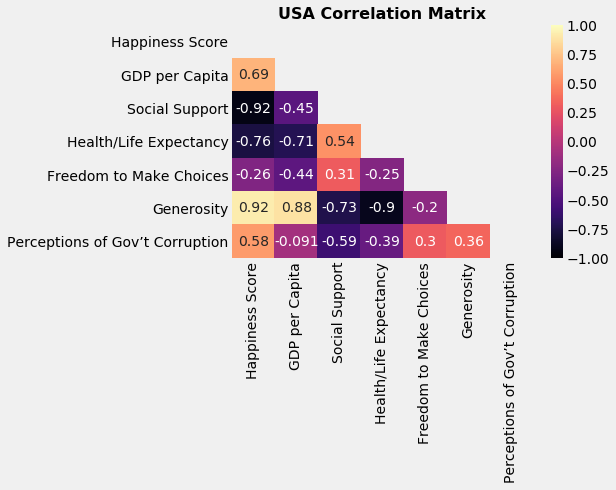

In [8]:
 correlation_matrix(us_df)

Let's take a look at the correlation between variables that make up the Happiness Score of USA. There is a strong correlations between Happiness and GDP per Capita and Generosity.Perceptions of Govt' Corruption also seems to have moderately strong correlation to Happiness.Social support seems to be negatively corelated with happiness.I Think the 2020 data might have skewed the the social support results. During the COVID-19 pandemic, many households are experiencing family burnout from spending so much time together. Single working parents are especially facing a lot of pressure, juggling between work and childcare further exacerbating togetherness fatigue. 

In [9]:
# Calculate correlation between all 6 metrics for top Five Countries
happiness_mean = clean_data_all_years_df.groupby(['Country']).mean()
happiness_five= happiness_mean.nlargest(5,'Happiness Score')
happiness_five = happiness_five.drop(columns=['Unnamed: 0','Social Support', 'Generosity','Freedom to Make Choices','Year'])
happiness_five = happiness_five.reset_index()
happiness_five

,Country,Happiness Score,GDP per Capita,Health/Life Expectancy,Perceptions of Gov’t Corruption
0,Finland,7.61834,1.355948,0.888268,0.411302
1,Denmark,7.56972,1.397022,0.886188,0.431712
2,Norway,7.53420,1.512422,0.897906,0.357765
3,Switzerland,7.50598,1.471017,0.948139,0.377397
4,Iceland,7.49970,1.391359,0.928345,0.140763


In [10]:
def correlation_matrix(happiness_five):
    plt.figure()
    sns.heatmap(happiness_five.corr(), center=0, annot=True, vmin=-1, vmax=1, cmap="magma")
    plt.title('Top Five Countries Correlation Matrix',fontweight='bold',fontsize = 16)
    plt.savefig("correlations_top5.png")

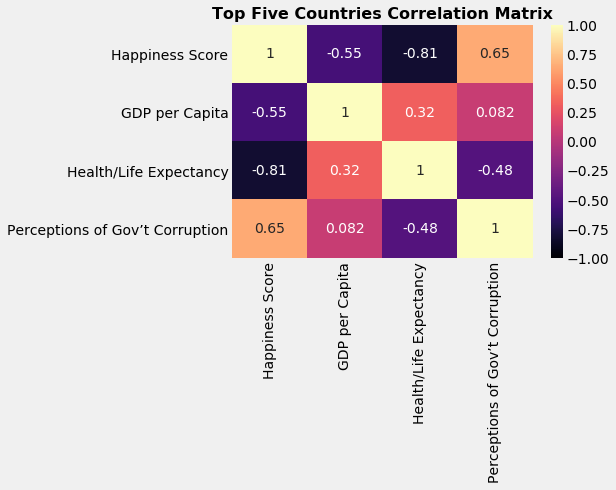

In [11]:
correlation_matrix(happiness_five)

The Analysis of Top 5 happy countries shows that trust in Govt. has a strong correlation to overall happiness.The higher the GDP per Capita, better the Life Expectency.

In [12]:
# Calculate average of all metrics over Five Years
mean_data=clean_data_all_years_df.groupby(['Country']).mean()
mean_all_years = mean_data.drop(columns=['Unnamed: 0','Year'])
average_all_years = mean_all_years.reset_index()
average_all_years


,Country,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption
0,Afghanistan,3.31118,0.353291,0.420469,0.247248,0.071096,0.221757,0.038901
1,Albania,4.69734,0.944229,0.760160,0.794312,0.392821,0.173548,0.035447
2,Algeria,5.54762,1.013876,1.087262,0.690609,0.138068,0.077358,0.137171
3,Argentina,6.33954,1.106026,1.355823,0.773404,0.495840,0.083490,0.059423
4,Armenia,4.45856,0.847144,0.942366,0.707042,0.251950,0.088129,0.051891
...,...,...,...,...,...,...,...,...
136,Venezuela,5.18004,0.997668,1.341781,0.693042,0.182237,0.062940,0.062031
137,Vietnam,5.15330,0.740602,1.206547,0.737175,0.588486,0.189241,0.089008
138,Yemen,3.51588,0.458555,0.964758,0.368312,0.221777,0.097605,0.068808
139,Zambia,4.31048,0.585052,0.928365,0.315632,0.462708,0.229372,0.089742


In [13]:
#Creating empty columns for storing Latitudes and Longitudes
average_all_years['Lat']= ""
average_all_years['Lon']= ""

# Loop through Countries in dataframe and run API calls
for i in range (0, len(average_all_years),1):
    geocode_result= gm.geocode(average_all_years.iat[i,0])
    try:
        lat=geocode_result[0]['geometry']['location']['lat']
        lon=geocode_result[0]['geometry']['location']['lng']
        average_all_years.iat[i, average_all_years.columns.get_loc('Lat')] = lat
        average_all_years.iat[i, average_all_years.columns.get_loc('Lon')] = lon
     
        # If no record found "skip" to next call
    except (KeyError, IndexError):
        print(f'Country not found. Skipping...')
        

In [14]:
average_all_years

,Country,Happiness Score,GDP per Capita,Social Support,Health/Life Expectancy,Freedom to Make Choices,Generosity,Perceptions of Gov’t Corruption,Lat,Lon
0,Afghanistan,3.31118,0.353291,0.420469,0.247248,0.071096,0.221757,0.038901,33.9391,67.71
1,Albania,4.69734,0.944229,0.760160,0.794312,0.392821,0.173548,0.035447,41.1533,20.1683
2,Algeria,5.54762,1.013876,1.087262,0.690609,0.138068,0.077358,0.137171,28.0339,1.65963
3,Argentina,6.33954,1.106026,1.355823,0.773404,0.495840,0.083490,0.059423,-38.4161,-63.6167
4,Armenia,4.45856,0.847144,0.942366,0.707042,0.251950,0.088129,0.051891,40.0691,45.0382
...,...,...,...,...,...,...,...,...,...,...
136,Venezuela,5.18004,0.997668,1.341781,0.693042,0.182237,0.062940,0.062031,6.42375,-66.5897
137,Vietnam,5.15330,0.740602,1.206547,0.737175,0.588486,0.189241,0.089008,14.0583,108.277
138,Yemen,3.51588,0.458555,0.964758,0.368312,0.221777,0.097605,0.068808,15.5527,48.5164
139,Zambia,4.31048,0.585052,0.928365,0.315632,0.462708,0.229372,0.089742,-13.1339,27.8493


In [17]:

# Configure gmaps with API key
gmaps.configure(api_key=g_key)

# # Store 'Country' as locations
locations = average_all_years[['Lat','Lon']]

# Convert Corruption to float and store 
corruption = average_all_years['Perceptions of Gov’t Corruption'].astype(float)
max_corruption = corruption.max()

# Create a Heatmap layer
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights= corruption, 
                                 dissipating=False, max_intensity= max_corruption,
                                 point_radius = 4)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

We used heat maps to visualize how perception of Govt. Corruption is clustered.The map above depicts the scores regarding how public felt about the absence of corruption within their countries.

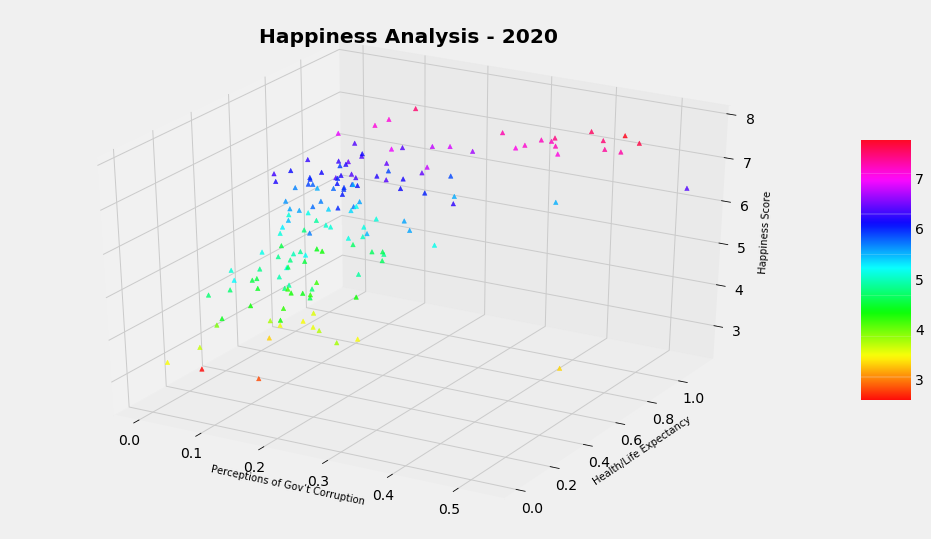

In [16]:
# Creating dataset
x_value = list(clean_data_2020_df['Perceptions of Gov’t Corruption']) # Read Perceptions of Gov’t Corruption
y_value = list(clean_data_2020_df['Health/Life Expectancy']) # Read Health/Life Expectancy
z_value = list(clean_data_2020_df['Happiness Score']) # Read Happiness Score

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x_value, y_value, z_value,
                    alpha = 0.8,
                    c = (z_value), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title('Happiness Analysis - 2020', fontweight ='bold')
ax.set_xlabel('Perceptions of Gov’t Corruption', fontsize = 10) 
ax.set_ylabel('Health/Life Expectancy', fontsize = 10) 
ax.set_zlabel('Happiness Score', fontsize = 10)
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# Save and show plot
plt.savefig("3D scatter.png")
plt.show()



One variable that I found most interesting was Perceptions of Gov’t Corruption.Not all governments are created equal. Some are better at governing than others.Public needs to believe that the government has their best interests at heart. From analyzing data over a period of 5 years we concluded that only a few countries achieved positive results.The maximum happiness scores tend to be when public has most trust in Government and higher life expectancy.Interestingly,good health alone didn't result in higher happiness score. High health expectancy but lower trust in Govt. resulted in lower happiness scores.

### Conclusion: 

"The essence of good government is trust."
                           
                           Kathleen Sebelius
                          
The happiest countries generally tend to be ones with strong and stable economies. The importance of Economy is also strongly positively correlated with those of Health and Perceptions Of Gov't Corruption. I would conclude that three factors–Economy,Health and trust in Gov't tend to be particularly important because they directly affect the happiness score of individuals living in the top 5 countries. 
USA could therefore improve its ranking, by focusing on gaining public trust and having policies that focus on the well-being of society. In addition, better public social initiatives could also have an impact on the overall happiness in USA, since generosity seems to have a strong positive correlation on US happiness.


